### **About Dataset :**

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

### **Objective of todays workshop:**

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

### **what you need to do:**

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree and KNN classifier, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

**DATA Source: IBM**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Semester1_25/Week 11'

/content/drive/MyDrive/Semester1_25/Week 11


## **Read data using pandas dataframe:**

In [4]:
df= pd.read_csv("drug200.csv", delimiter=",")
df[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,NORMAL,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## **Pre-processing**

### **Encoding the target variable.**

In [5]:
le_drug = LabelEncoder()
df['Drug'] = le_drug.fit_transform(df['Drug'])

### **Separating the Independent variable and Target column:**

In [6]:
X_dt = df.drop('Drug', axis=1).copy()
y_dt = df['Drug']

As you may figure out, some featurs in this dataset are catergorical such as __Sex__ or __BP__.
Convert categorical variable into dummy/indicator variables.

In [7]:
# Label encode categorical features for Decision Tree
for col in ['Sex', 'BP', 'Cholesterol']:
    X_dt[col] = LabelEncoder().fit(X_dt[col]).transform(X_dt[col])
X_dt

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,1,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020



## **Setting up the Decision Tree**


In [8]:
from sklearn.model_selection import train_test_split

In [15]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X_dt,y_dt, test_size=0.2)

## **Modeling**
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>


In [16]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)


Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [17]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## **Prediction**
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [18]:
predTree = drugTree.predict(X_testset)

## **Evaluation**
Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [19]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.975


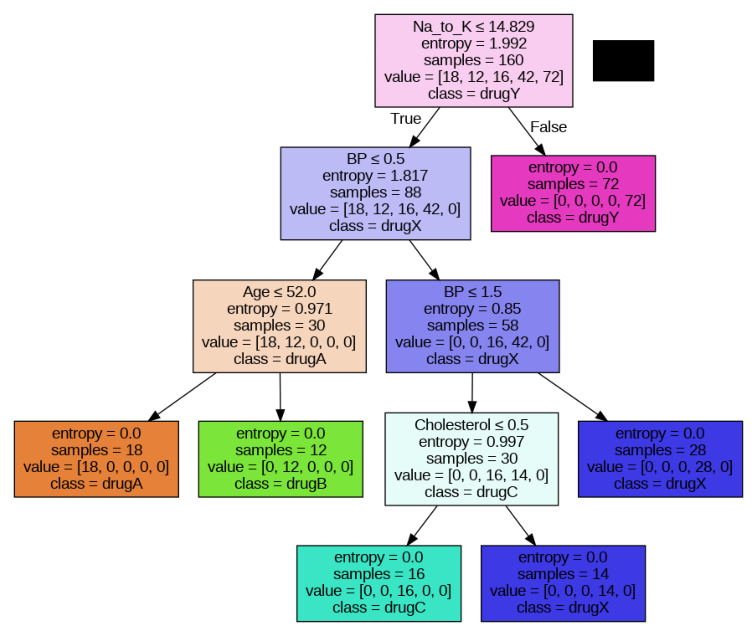

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

dot_data = StringIO()
filename = "drugtree.png"

# Features used in training
featureNames = df.columns[0:5]  # ['Age','Sex','BP','Cholesterol','Na_to_K']

# Convert numeric labels back to original drug names
class_names = le_drug.inverse_transform(np.unique(y_trainset))

# Export tree
tree.export_graphviz(
    drugTree,
    feature_names=featureNames,
    out_file=dot_data,
    class_names=class_names,  # must be strings
    filled=True,
    special_characters=True,
    rotate=False
)

# Generate PNG
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

# Display image
img = mpimg.imread(filename)
plt.figure(figsize=(12, 8))  # smaller size for notebook readability
plt.imshow(img)
plt.axis('off')
plt.show()


### **Building the KNN algorithm:**

In [23]:
#KNN (One-Hot + Scaling)
# -----------------------------
X_knn = df.drop('Drug', axis=1)
y_knn = df['Drug']

cat_cols = ['Sex', 'BP', 'Cholesterol']
num_cols = ['Age', 'Na_to_K']

## **Encoding the KNN:**

In [24]:
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(), cat_cols),
    ("num", StandardScaler(), num_cols)
])

knn_model = Pipeline([
    ("prep", preprocess),
    ("knn", KNeighborsClassifier(n_neighbors=3))
])

## **Building the KNN Algorithm:**

In [25]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=42
)

knn_model.fit(X_train_knn, y_train_knn)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'BP', 'Cholesterol']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Na_to_K'])])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

### **Testing the accuracy of the built model:**

In [26]:
print("KNN Accuracy:", knn_model.score(X_test_knn, y_test_knn))

KNN Accuracy: 0.925


### **Goal:**

### **Predict the drug for a new patient:**

```
Age = 45
Sex = 'M'
BP = 'NORMAL'
Cholesterol = 'HIGH'
Na_to_K = 15

```




**Step 1: Create the new patient as a DataFrame**

In [28]:
import pandas as pd

new_patient = pd.DataFrame({
    'Age': [45],
    'Sex': ['M'],
    'BP': ['NORMAL'],
    'Cholesterol': ['HIGH'],
    'Na_to_K': [15]
})

**Step 2: Apply the same preprocessing steps**

In [30]:
# Recreate encoders used for training
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()

# Fit encoders on the training dataset
le_sex.fit(df['Sex'])
le_bp.fit(df['BP'])
le_chol.fit(df['Cholesterol'])

LabelEncoder()

**Step3: Transform new patient**

In [31]:
# Transform new patient
new_patient_dt = new_patient.copy()
new_patient_dt['Sex'] = le_sex.transform(new_patient_dt['Sex'])
new_patient_dt['BP'] = le_bp.transform(new_patient_dt['BP'])
new_patient_dt['Cholesterol'] = le_chol.transform(new_patient_dt['Cholesterol'])

**Step 4: Predict the new drug for new dataset:**

In [32]:
# Predict
dt_pred_encoded = drugTree.predict(new_patient_dt)[0]
dt_pred = le_drug.inverse_transform([dt_pred_encoded])[0]

print("Decision Tree predicts:", dt_pred)

Decision Tree predicts: drugY


**Use KNN to predict the drug for new patient:**

In [33]:
# 3. KNN prediction
# -----------------------------
# For KNN, the pipeline handles one-hot encoding and scaling automatically
knn_pred = knn_model.predict(new_patient)[0]
knn_pred = le_drug.inverse_transform([knn_pred])[0]

print("KNN predicts:", knn_pred)

KNN predicts: drugX
